In [2]:
import numpy as np

# Test the output files

# Load the index.json
with open("C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/index.json") as f:
    idfs_to_send = json.load(f)["iteration"]

for idf_pathh in idfs_to_send:
#     idf_pathh = idfs_to_send[1]

    # Load each file from the index json list (using name)
    idf_file = "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/{0:}.idf".format(idf_pathh["id"])
    IDF.setiddname("C:/EnergyPlusV8-8-0/Energy+.idd")
    idf = IDF(idf_file)
    print("##################################")
    print("{0:}".format(idf_pathh["id"]))
    print("source_g_value: {0:} - {1:} indexed g_value".format(idf.idfobjects["WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM"][0].Solar_Heat_Gain_Coefficient, idf_pathh["glazing_g_value"]))
    print("insulation thickness: {0:0.2f} - {1:} wall_u_value".format(idf.idfobjects["MATERIAL"][2].Thickness, idf_pathh["wall_u_value"]))
    print("fenestration_proxy: {0:} - {1:} glazing_ratio".format(np.sum([np.sum(i.coords) for i in idf.idfobjects["FENESTRATIONSURFACE:DETAILED"]]), idf_pathh["glazing_ratio"]))


# For the file, get teh wall u-value, glazing g-value, area of glass for all zones and internal gains sum


##################################
fabee092-3456-4d8c-9fb6-bc325c7f8ad3
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.36 - 0.1 wall_u_value
fenestration_proxy: 35057.5481234 - 0.2 glazing_ratio
##################################
5c1ded7d-034b-4862-836a-5d4f64af9d84
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.36 - 0.1 wall_u_value
fenestration_proxy: 35057.5479784 - 0.3 glazing_ratio
##################################
b5df47ad-7a20-4e10-b8b1-ee5dc3d52840
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.36 - 0.1 wall_u_value
fenestration_proxy: 35057.5481081 - 0.4 glazing_ratio
##################################
9ac93501-0c26-40f7-8004-ba2c0d694610
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.36 - 0.1 wall_u_value
fenestration_proxy: 35057.5481443 - 0.5 glazing_ratio
##################################
012308ed-59b1-4366-92d5-558de3f99a2a
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.36 - 0

##################################
9c3dd7a5-f1de-4551-89a6-17220f8e3923
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.12 - 0.3 wall_u_value
fenestration_proxy: 35057.5480547 - 0.6 glazing_ratio
##################################
f6284d8c-9ec3-450b-b75d-8841f90b462d
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.12 - 0.3 wall_u_value
fenestration_proxy: 35057.5481234 - 0.2 glazing_ratio
##################################
1c9e7e3c-4357-4a4b-a14a-a83dec89c7db
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.12 - 0.3 wall_u_value
fenestration_proxy: 35057.5479784 - 0.3 glazing_ratio
##################################
4e2cfbc4-6a0a-406d-a26c-a743669b5859
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.12 - 0.3 wall_u_value
fenestration_proxy: 35057.5481081 - 0.4 glazing_ratio
##################################
ecd44049-d775-49b2-99e4-adfd2948b90a
source_g_value: 0.2 - 0.2 indexed g_value
insulation thickness: 0.12 - 0

KeyboardInterrupt: 

In [1]:
import uuid
import os
import json
import time

master_dict_entries = []

#List all files in directory (IDF and JSON)
_dir = r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs"
idf_sources = []
json_sources = []
for file in os.listdir(_dir):
    if file.endswith(".idf"):
        idf_sources.append(os.path.join(_dir, file))
    if file.endswith(".json"):
        json_sources.append(os.path.join(_dir, file))

g_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
wall_u_values = [0.1, 0.2, 0.3, 0.4]
internal_profiles = ["High Density Seminar Room", "Computer Labs", "Open Plan Academic Office"]

for g_value in g_values:
    for wall_u_value in wall_u_values:
        for internal_profile in internal_profiles:
            for json_details_file, idf_source_file in list(zip(*[json_sources, idf_sources])):
            #     json_details_file = json_sources[0]
            #     idf_source_file = idf_sources[0]

#                 g_value = 0.5
#                 wall_u_value = 0.2
#                 internal_profile = "Computer Labs"

                new_unique_id = str(uuid.uuid4())
                new_unique_id_string = new_unique_id + ".idf"
                new_idf_path = "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/"+new_unique_id_string

                with open(json_details_file) as f:
                    details = json.load(f)

                config_dict = {
                    "idd_file_windows": "C:/EnergyPlusV8-8-0/Energy+.idd",
                    "weather_file": "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw",
                    "zone_conditions_library": "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json",
                    "zone_template": internal_profile,
                    "wall_reflectivity": 0.5,
                    "ceiling_reflectivity": 0.7,
                    "floor_reflectivity": 0.2,
                    "exterior_wall_u_value": wall_u_value,
                    "exterior_floor_u_value": 0.22,
                    "exterior_roof_u_value": 0.18,
                    "glass_solar_heat_gain_coefficient": g_value,
                    "glass_visible_transmittance": 0.65,
                    "glass_u_value": 1.6,
                    "daylight_analysis_grid_spacing": 0.1,
                    "daylight_analysis_grid_edge_offset": 0.15,
                    "daylight_analysis_grid_surface_offset": 0.8,
                    "output_directory": "",
                    "analysis_zones": []
                }

                temp_config_file = "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp"
                with open(temp_config_file, "w") as f:
                    json.dump(config_dict, f, indent=4)

                %run "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/PythonScripts/00_ModifyIDF_FullConstructions.py" $idf_source_file $temp_config_file $new_idf_path

                details["glazing_g_value"] = g_value
                details["id"] = new_unique_id
                details["wall_u_value"] = wall_u_value
                details["zone_thermal_template"] = internal_profile

                master_dict_entries.append(details)
                
#                 time.sleep(1)

with open("C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/index.json", "w") as f:
    json.dump({"iteration": master_dict_entries}, f, indent=4)


C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL modified
SCHEDULE:DAY:HOURLY modified
SCHEDULE:WEEK:DAILY modified
SCHEDULE:WEEK:COMPACT modified
SCHEDULE:YEAR modified
PEOPLE modified
LIG


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/012308ed-59b1-4366-92d5-558de3f99a2a.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/0c0f16ad-700a-4671-8267-d23416cc7003.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/893dbfe8-8958-4e53-b012-d5782136f2b6.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/bff9236c-3348-4daf-9df7-1155bd9fc71c.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/36c2f9ed-c24f-452a-9c1c-5b85c4cd56c9.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/f72acdd6-4b63-465c-8230-d43fa39bef9f.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/b9efcd52-a4d7-4aeb-98ad-3c4db3d7d5dc.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/9c3dd7a5-f1de-4551-89a6-17220f8e3923.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/4a7097b7-b9dc-4a0d-bde7-5da066541a1b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/9728dbbf-1f53-4cec-a1e0-14fd4dc91d76.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/42366155-4470-4fa0-a097-30e7f418bae1.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/467cf06b-1c79-4199-b86c-afd52f4a3b42.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/04ea8c0f-1920-42c2-a85c-3ea5eef41cc2.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/86e53b00-289d-436f-a803-d447c88a1504.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/df71ddc1-64d0-40e9-8f51-aac02336ccec.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/047daf69-bf8a-4cc6-b8e2-09d4ff37f6f0.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/ced4a372-d8d4-4bda-a126-d2471fd7f1a6.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/e3e0af46-7986-4b32-9256-d1d6e844632e.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/f41ef261-1b39-464d-99c9-26068083a040.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/dd3f25b8-05ab-4a95-8663-1c26829a3a0b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/ca1b84a0-7bc2-455c-9c92-eaea16d6f3ab.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/9cc25c77-9d7b-454d-97a9-b245f4fa2768.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/70a0adcf-ef4b-411d-80c4-140153c477a9.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/6703664b-b6ee-4fec-9bb8-0fe62caff6d1.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/1704e70c-c10c-4868-bd66-f6864cec533b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/f9f77f02-7355-41e5-891d-4ae57db15c7e.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/74187446-9b6c-438a-ae87-f52278f9060c.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/f937bbf0-6a2a-4573-b85e-b984633a093c.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/512ffc84-63c3-490a-83d9-abf6dd378f07.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/30cb8283-ddbe-4f0e-bcca-b3daf519f526.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/2a7bb6e1-8f48-44aa-a1ec-54299c93b84b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/58a56412-e528-4c68-9c7f-4d256959bb8a.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/fe8db679-f468-4d18-ac96-6b16856b3a15.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/141a3a66-771c-4c4a-aadc-7efb8976a86f.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/170b4c5c-51f5-4cf3-9914-b204b207c182.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/9351d52b-9eac-416b-b209-91589ce99f8c.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/bf08732a-bd64-432f-bb0f-7e2a5e63da45.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/e0b00305-8585-4703-be64-93d7ecf1f010.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/35f2862c-a047-4c80-894f-fe5a29084f09.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/37635c1f-39a5-4bf0-aba7-061826d1aebf.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/0ce6ce17-0f7a-46f5-ac3a-3ca7133b6edf.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/30df033b-6f5f-44ec-8a4b-28dd6635ad6a.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/6af8de05-c654-4034-a05d-b35171e448c8.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/e0361a1d-99a0-44cf-85be-33b6093bab67.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/93c74ff6-0a0d-4866-9f00-2130b56a4463.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/638480ac-73d5-4aa7-a74e-fefd609ce20b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/4221c4b8-242c-4bea-95e7-880c67bde5de.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/53966364-df6b-425f-b76c-439c01e80ca1.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/7b64a281-db7c-47c8-925d-5b4a6578a62f.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/082c610d-0863-49cf-82af-fec36cf6863b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/1975d816-94e6-47fc-88ce-e1a39cb22501.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/acb7112d-4bf0-486a-a3ab-12429b6f215b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/303fc04e-e5a6-40c0-ab40-180a9cea9ce1.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/08d8006b-cf3f-4b15-8aa0-5b1c6ab8cbb9.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/76176fac-502d-4ce8-a5c0-4b1bf7aeaac6.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/cffc1469-f7df-4f3f-aefb-d817dd28ba22.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/b6b8bca2-0dd1-40d6-9d38-61b1baac1a34.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/12d758a0-c902-48dd-92e7-811fb56f9ada.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/750a49e7-d369-478d-b341-fc049c655392.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/3f34d525-ae96-47a5-b1bc-57626f974e26.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/75662407-1457-4b54-9e7e-822406ef2234.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/8dd50176-2ad6-475c-9b6c-10fe58e7a5d4.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/dcd6c229-37ed-4b9f-9800-13a3287750f1.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/95b127ce-0423-4e0d-8e70-938c376b367f.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/9bca2682-2075-4db3-b017-169d3561617e.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/f8957183-355a-42b1-8a83-2e3f7da15309.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/8adf2409-ead5-444c-98bd-6b60564bfac5.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/569338a4-c50d-4a95-a13b-d0210612a17c.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/7a53a275-bc70-420c-87c1-50c07b5c92b6.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/10e1d7c2-6376-41b0-b38e-b18c5e47c3d3.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/27bf6cbc-b9e9-4951-ac9b-58ec8d3e5b5d.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/9a5d912b-3653-4e09-bd4a-8554fd8c442b.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/6c6efa8a-b642-4d87-ac34-3ffc20ef2050.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/cb9fb867-a908-4227-a942-6458988c3076.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/1e4c22f2-e242-43f6-8f68-b6c67cb8c6fa.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/5670b526-47f6-410f-bdad-18940c6f46eb.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/6f4a48cc-96fa-4808-98ae-aa2dc69b5107.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/409bddf6-b4c5-4d31-b18a-da6aa6b82726.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/8d861ab1-3222-4214-8780-6126fdcde0bb.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/2f8f4e8c-f7bf-4e3c-b85d-72f837cd7fe9.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be15-9bd6d650f24a.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:

HVACTEMPLATE:ZONE:IDEALLOADSAIRSYSTEM modified
DESIGNSPECIFICATION:OUTDOORAIR modified
SIZING:PARAMETERS modified
WINDOWMATERIAL:GLAZING objects modified
WINDOWMATERIAL:GAS objects modified
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM modified
MATERIAL modified
MATERIAL:AIRGAP modified
CONSTRUCTION modified
ZONELIST modified
OUTPUT:VARIABLE modified
OUTPUT:SURFACES:LIST modified
OUTPUTCONTROL:TABLE:STYLE modified
OUTPUT:VARIABLEDICTIONARY modified
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/062af32a-1cc0-4a7f-8dc0-9c413d0759a3.idf

IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/062af32a-1cc0-4a7f-8dc0-9c413d0759a3.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\3655566d-59fd-41af-be1

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\e84ad7e7-7f36-4efc-a855-7248a08c97a1.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to High Density Seminar Room

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL modified
SCHEDULE:DAY:HOURLY modified
SCHEDULE:WEEK:DAILY modified
SCHEDULE:WEEK:COMPACT modified
SCHEDULE:YEAR modified
PEOPLE modified
LIGHTS modified
ELECTRICEQUIPMENT modified
ZONEINFILTRATION:DESIGNFLOWRATE modified
ZONEVENTILATION:DESIGNFLOWRATE modified
HVACTEMPLATE:THERMOSTAT modified
HVACTEMPLATE:ZONE:IDEALLOADSAIRSY


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/89f7673e-ac2d-4186-9751-89e3565853a2.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\e84ad7e7-7f36-4efc-a855-7248a08c97a1.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Computer Labs

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:INTERVAL mod


IDF file modified and saved to C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/866f3bfd-31f8-4917-974a-67e814c48425.idf
C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

Config loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/config.jsontemp

IDF loaded from C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\e84ad7e7-7f36-4efc-a855-7248a08c97a1.idf

EPW loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw

Zone conditions loaded from C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json
Zone conditions set to Open Plan Academic Office

SITE:LOCATION modified
VERSION modified
SIZINGPERIOD:DESIGNDAY modified
SIMULATIONCONTROL modified
RUNPERIOD modified
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE modified
BUILDING modified
TIMESTEP modified
SHADOWCALCULATION modified
SCHEDULETYPELIMITS modified
SCHEDULE:DAY:

In [44]:
with open("C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/RhinoGrasshopper/IDFs/new_idfs/index.json", "w") as f:
    json.dump({"iteration": master_dict_entries}, f, indent=4)

In [7]:
import os
import json

#List all files in directory (IDF and JSON)
_dir = r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs"
idf_sources = []
json_sources = []
for file in os.listdir(_dir):
    if file.endswith(".idf"):
        idf_sources.append(os.path.join(_dir, file))
    if file.endswith(".json"):
        json_sources.append(os.path.join(_dir, file))


sources = list(zip(*[json_sources, idf_sources]))

# Generate a config file ON THE FLY!!!
g_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
wall_u_values = [0.1, 0.2, 0.3, 0.4]
internal_profiles = ["High Density Seminar Room", "Computer Labs", "Open Plan Academic Office"]

# Run the iteration
g_value = 0.3
wall_u_value = 0.2
internal_profile = "Computer Labs"

json_path, idf_path = sources[0]

# Define the contents of the temporary config file
config_dict = {
    "idd_file_windows": "C:/EnergyPlusV8-8-0/Energy+.idd",
    "weather_file": "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/GBR_Cardiff_CIBSE_TRY_CONVERTED.epw",
    "zone_conditions_library": "C:/Users/tgerrish/Desktop/SAMAzure/TestFiles/Resources/internal_gains_library.json",
    "zone_template": internal_profile,
    "wall_reflectivity": 0.5,
    "ceiling_reflectivity": 0.7,
    "floor_reflectivity": 0.2,
    "exterior_wall_u_value": wall_u_value,
    "exterior_floor_u_value": 0.22,
    "exterior_roof_u_value": 0.18,
    "glass_solar_heat_gain_coefficient": g_value,
    "glass_visible_transmittance": 0.65,
    "glass_u_value": 1.6,
    "daylight_analysis_grid_spacing": 0.1,
    "daylight_analysis_grid_edge_offset": 0.15,
    "daylight_analysis_grid_surface_offset": 0.8,
    "output_directory": "",
    "analysis_zones": []
}

# Write the temporary config json for reference
temp_config_file = r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\RhinoGrasshopper\IDFs\config.jsontemp"
with open(temp_config_file, "w") as f:
    json.dump(config_dict, f, indent=4)
    
%run "../..//PythonScripts/00_ModifyIDF_FullConstructions.py" idf_path temp_config_file output_idf_file

# For each source file, load the json string, modify the id, modify the internal profile and u-values and g value and save as new idf with new id and new id string

# Create new directory with processed files

In [ ]:
#######################

In [ ]:
# Testing the running of the scripts here

%run "TestFiles/PythonScripts/00_ModifyIDF.py" [args to program]



[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 

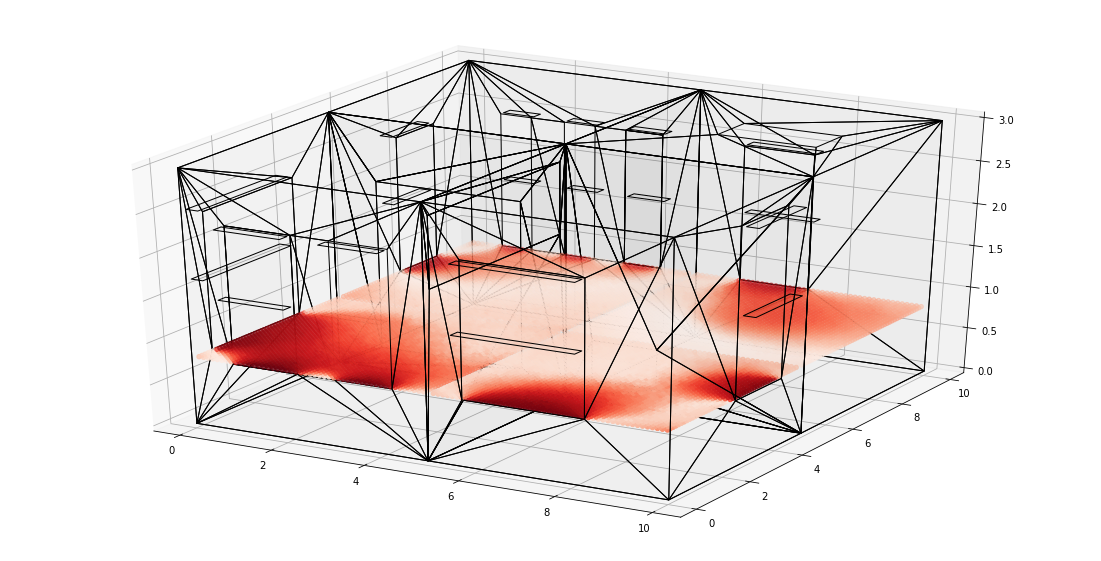

In [75]:
with open(r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\HoneybeeRecipeJSONs\surfaces.json", "r") as f:
    surfaces = json.load(f)

verts = []
for j in [i["vertices"] for i in surfaces["surfaces"]]:
    try:
        verts.append(j[0])
    except:
        pass

fig = plt.figure(figsize=(15, 7.5))
ax = Axes3D(fig)
xs, ys, zs = list(zip(*[item for sublist in verts for item in sublist]))
ax.set_xlim([min(xs), max(xs)])
ax.set_ylim([min(ys), max(ys)])
ax.set_zlim([min(zs), max(zs)])
ax.scatter(X, Y, Z, c=UDI, cmap="Reds_r")
[[ax.add_collection3d(Poly3DCollection([face], facecolor=(0, 0, 0, 0.01), edgecolor="k", zorder=0))] for face in verts]


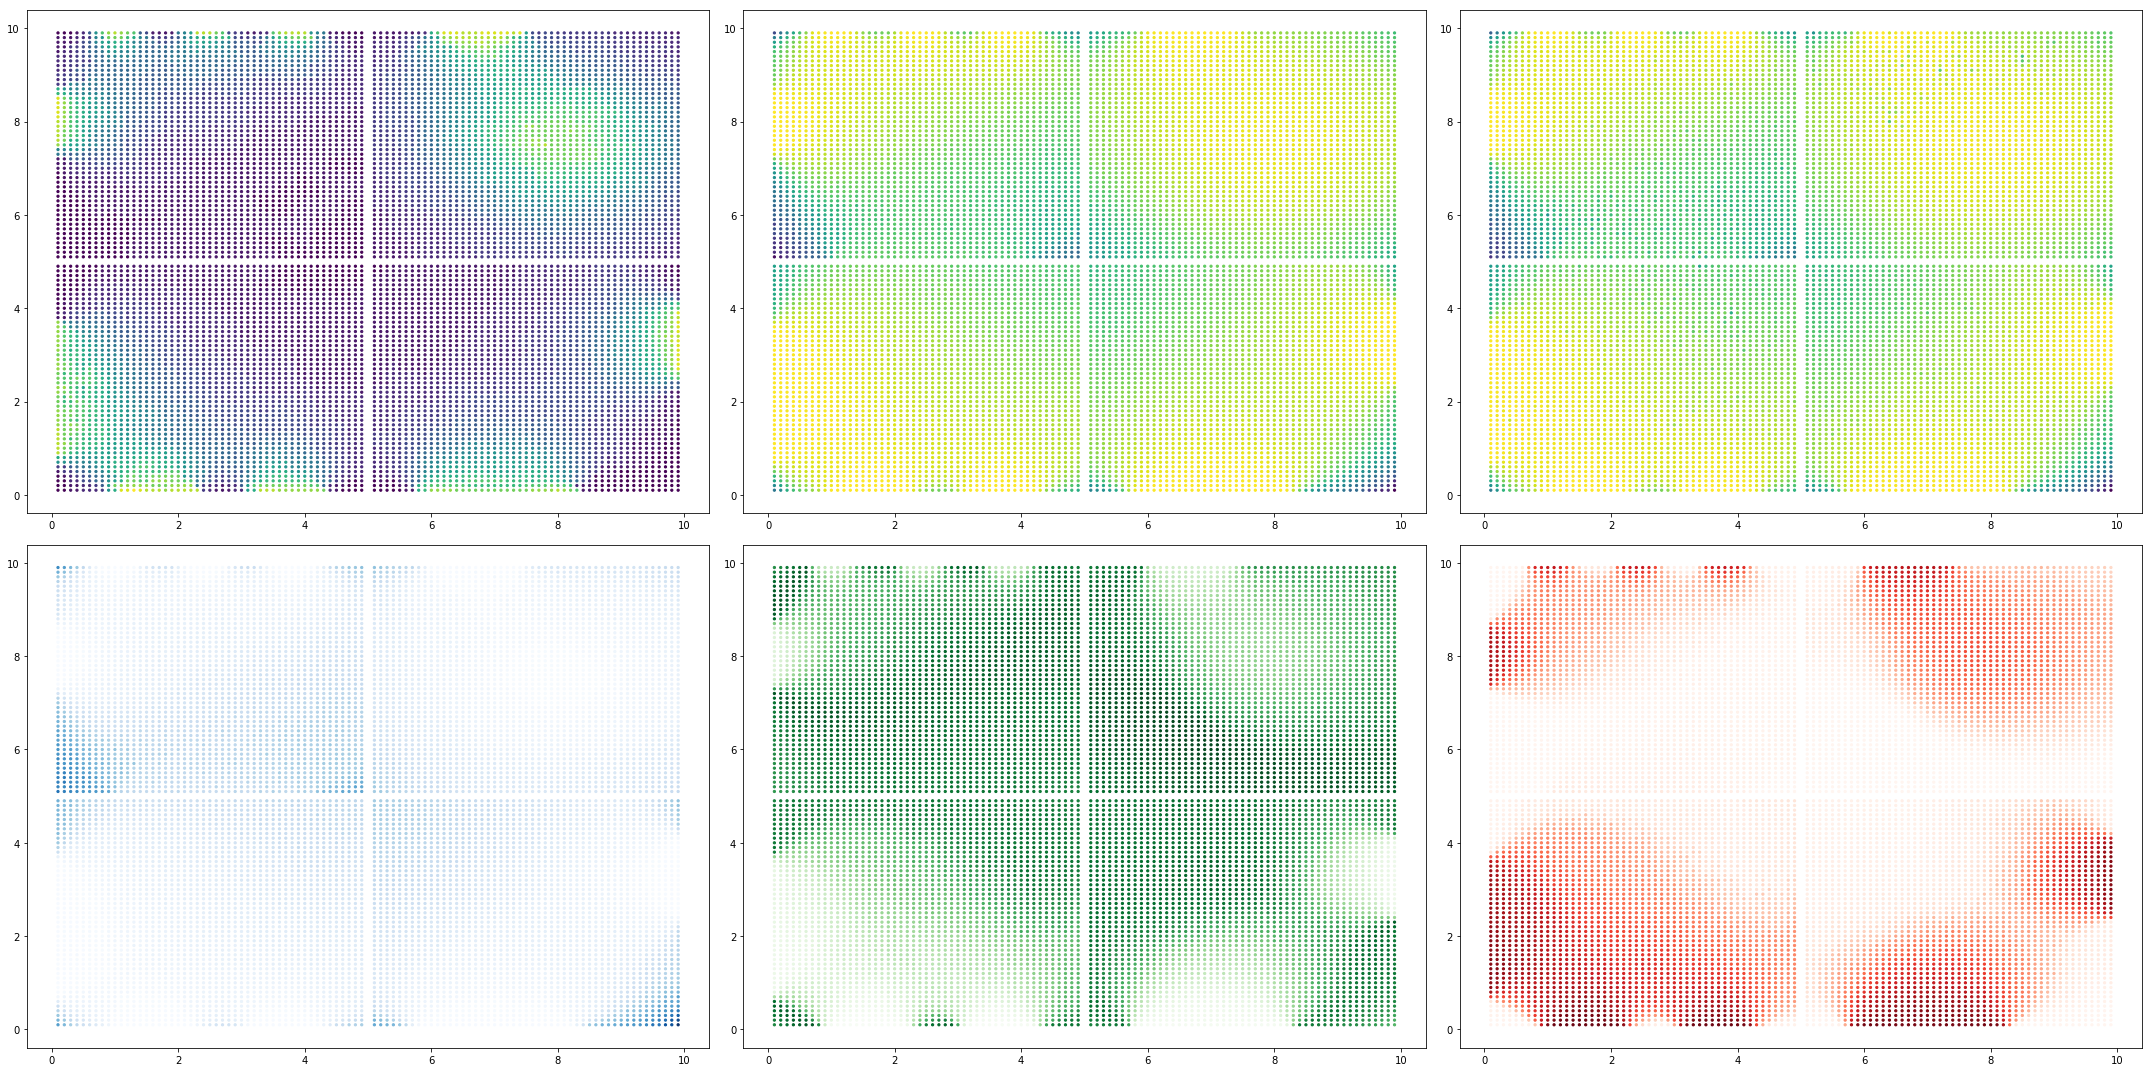

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import json

results_files = [
    r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\zone1_results.json",
    r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\zone3_results.json",
    r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\zone4_results.json",
    r"C:\Users\tgerrish\Desktop\SAMAzure\TestFiles\zone2_results.json"
]

X = []
Y = []
Z = []
DF = []
DA = []
CDA = []
UDILess = []
UDI = []
UDIMore = []

for res in results_files:
    with open(res) as data_file:
        results = json.load(data_file)
    X.append(results["X"])
    Y.append(results["Y"])
    Z.append(results["Z"])
    DF.append(results["DF"])
    DA.append(results["DA"])
    CDA.append(results["CDA"])
    UDILess.append(results["UDI_LESS"])
    UDI.append(results["UDI"])
    UDIMore.append(results["UDI_MORE"])

X = [item for sublist in X for item in sublist]
Y = [item for sublist in Y for item in sublist]
Z = [item for sublist in Z for item in sublist]
DF = [item for sublist in DF for item in sublist]
DA = [item for sublist in DA for item in sublist]
CDA = [item for sublist in CDA for item in sublist]
UDILess = [item for sublist in UDILess for item in sublist]
UDI = [item for sublist in UDI for item in sublist]
UDIMore = [item for sublist in UDIMore for item in sublist]

fig, ax = plt.subplots(2, 3, figsize=(30, 15))
ax[0][0].scatter(X, Y, c=DF, cmap="viridis", s=5)
ax[0][1].scatter(X, Y, c=DA, cmap="viridis", s=5)
ax[0][2].scatter(X, Y, c=CDA, cmap="viridis", s=5)
ax[1][0].scatter(X, Y, c=UDILess, cmap="Blues", s=5)
ax[1][1].scatter(X, Y, c=UDI, cmap="Greens", s=5)
ax[1][2].scatter(X, Y, c=UDIMore, cmap="Reds", s=5)
plt.tight_layout()

IndexError: list index out of range

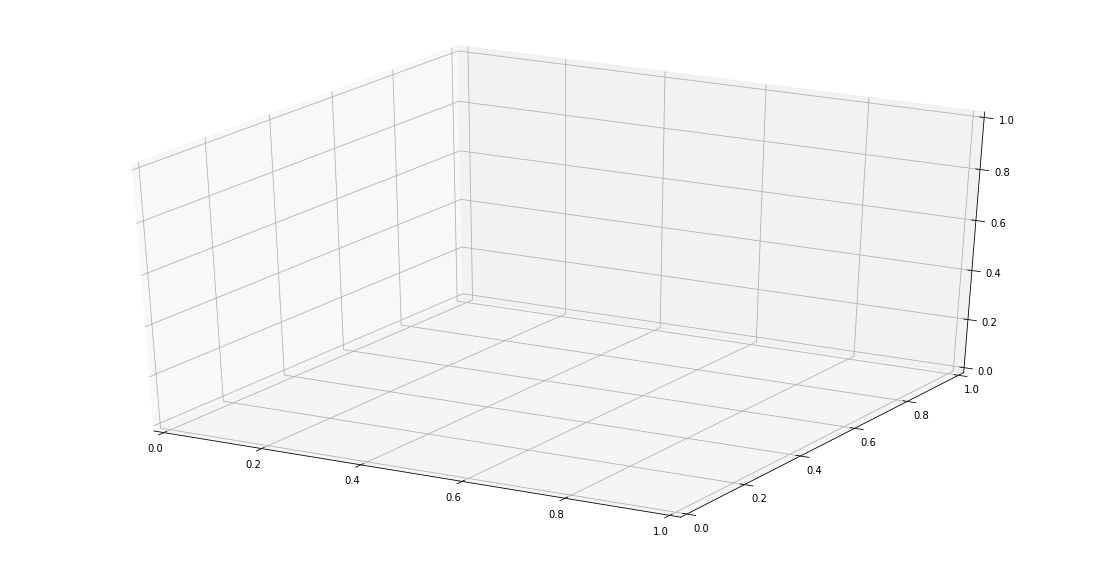

In [58]:
# Visualise the Radiance Geometry (from the geometry.json)
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def load_json(path):
    """
    Description:
        Load a JSON file into a dictionary object
    Arguments:
        path [string]: The location of the JSON file being loaded
    Returns:
        dictionary [dict]: Dictionary containing contents of loaded JSON file
    """
    with open(path) as data_file:
        return json.load(data_file)

fig = plt.figure(figsize=(15, 7.5))
ax = Axes3D(fig)
xs, ys, zs = list(zip(*[item for sublist in [srf["vertices"][0] for srf in load_json("HoneybeeRecipeJSONs\surfaces.json")["surfaces"]] for item in sublist]))# ax.set_xlim([min(xs), max(xs)])
ax.set_ylim([min(ys), max(ys)])
ax.set_zlim([min(zs), max(zs)])

for srf in load_json("HoneybeeRecipeJSONs\surfaces.json")["surfaces"]:
    if srf["surface_type"] == 0:
        col = (0, 0, 1, 0.1)
    elif srf["surface_type"] == 1:
        col = (0, 1, 0, 0.1)
    elif srf["surface_type"] == 2:
        col = (1, 0, 0, 0.1)
    elif srf["surface_type"] == 3:
        col = (1, 1, 0, 0.1)
    elif srf["surface_type"] == 4:
        col = (0, 1, 1, 0.1)
    elif srf["surface_type"] == 5:
        col = (1, 1, 1, 0.1)

    [ax.add_collection3d(Poly3DCollection([srf["vertices"][0]], facecolor=col, edgecolor="w", zorder=0))]

def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

axisEqual3D(ax)